In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Linear Regression on Single Variable**

In [2]:
data = pd.read_csv('ex1data1.txt', header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit vs. Population')

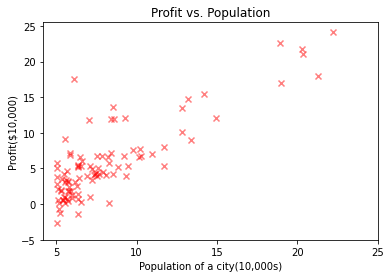

In [4]:
plt.scatter(data[0], data[1], marker="x", c='red', alpha=0.5)
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of a city(10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit vs. Population")

**COST FUNCTION**

$J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$


In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h_theta = X.dot(theta)
    J = 1/(2*m) * np.sum((h_theta-y)**2)
    return J

In [6]:
mod_data = data.values
m = len(mod_data[:,-1])
X = np.column_stack((np.ones((m, 1)), mod_data[:, 0].reshape(m, 1)))
y = mod_data[:, 1].reshape(m, 1)
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01

In [7]:
J = compute_cost(X, y, theta)

**GRADIENT DESCENT**

Minimize the cost function $J(\Theta)$

By updating Equation and repeat unitil convergence

$\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\Theta_j$ for all $j$)

In [8]:
def gradientDescent(X, y, theta, alpha, n_iters, graph=True):
    m = len(y)
    J_history = []
    
    for i in range(n_iters):
        h_theta = X.dot(theta)
        err = np.dot(X.T, (h_theta - y))
        descent = alpha * 1/m * err
        theta -= descent
        
        J_history.append(compute_cost(X, y, theta))
    if graph:
        plt.plot(J_history)
        plt.xlabel("No. of Iterations")
        plt.ylabel("J(theta)")
        plt.title("Cost function using Gradient Descent")
        
    return theta, J_history        

h(x)= -3.63 + 1.17 x1


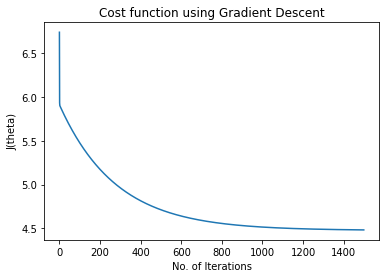

In [9]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print(f"h(x)= {round(theta[0, 0], 2)} + {round(theta[1, 0], 2)} x1")

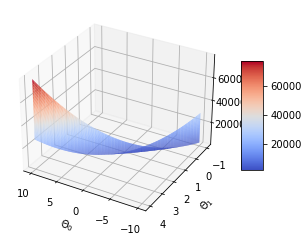

In [10]:
from mpl_toolkits.mplot3d import Axes3D

theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=compute_cost(X,y,t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,120)

Text(0.5, 1.0, 'Profit vs. Population')

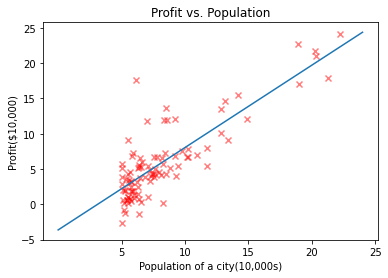

In [11]:
plt.scatter(data[0], data[1], marker="x", c='red', alpha=0.5)
x_value = [x for x in range(25)]
y_value = [y*theta[1] + theta[0] for y in x_value]
plt.plot(x_value, y_value)
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel("Population of a city(10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit vs. Population")

**PREDICTIONS**

Make predictions using the optimized $\Theta$ values

$h_\Theta(x) = \Theta^Tx$


In [12]:
def predict(X, theta):
#     predictions = X.dot(theta)
    predictions = np.dot(theta.T, X)
    return predictions[0]

In [13]:
predict1 = predict(np.array([1,3.5]),theta)*10000
print(f'For population=35000, we predict a profit of ${round(predict1, 0)}')

For population=35000, we predict a profit of $4520.0


In [14]:
predict2 = predict(np.array([1,7]),theta)*10000
print(f'For population=70000, we predict a profit of ${round(predict2, 0)}')

For population=70000, we predict a profit of $45342.0


# **Linear Regression on Multiple Variables**

In [15]:
house_data = pd.read_csv('ex1data2.txt', header=None)
house_data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
house_data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [17]:
house_data.shape

(47, 3)

In [18]:
mod_house_data = house_data.values

In [19]:
m2 = len(mod_house_data[:, 2])
X2 = mod_house_data[:, :2].reshape(m2, 2)
y2 = mod_house_data[:, 2].reshape(m2, 1)

**FEATURE SCALING**

To make sure features are on a similar scale:

$x_i = \frac{x_i - \mu_i}{\sigma_i}$


In [20]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean)/std
    return X_norm, mean, std

In [21]:
X2, mu, sigma = featureNormalize(X2)
X2 = np.column_stack((np.ones((m2, 1)), X2))

In [22]:
theta2 = np.zeros((3, 1))

**Compute Cost $J(\Theta)$**

In the multivariate case, the cost function can also be written in the following vectorized form:

$J(\Theta) = \frac{1}{2m} (X\Theta - \overrightarrow{y})^T (X\Theta - \overrightarrow{y})$


In [23]:
compute_cost(X2,y2,theta2)

65591548106.45744

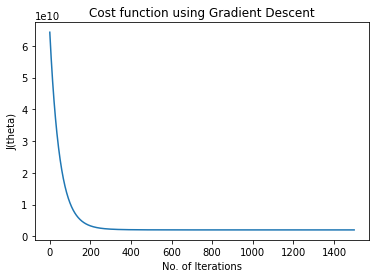

In [24]:
theta2, J_history = gradientDescent(X2, y2, theta2, alpha, iterations)

**LEARNING RATE EXPLORATION**

In [25]:
lr = [0.01, 0.03, 0.09, 0.1, 0.3, 0.9]
J_histories = []
for x in lr:
    theta2, J_history = gradientDescent(X=X2, y=y2, theta=theta2, alpha=x, n_iters=100, graph=False)
    J_histories.append(J_history)

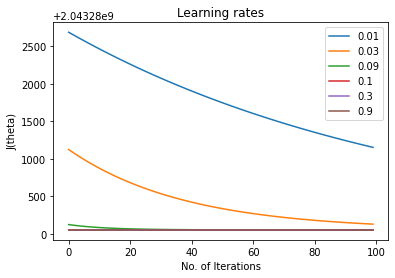

In [26]:
len_J = len(J_histories[0])
for x in range(len(lr)):
    plt.plot(J_histories[x], label=lr[x])
plt.xlabel("No. of Iterations")
plt.ylabel("J(theta)")
plt.title("Cost function using Gradient Descent")
plt.title('Learning rates')
plt.legend(loc=1)

**PREDICTIONS**

In [27]:
x_sample = featureNormalize(np.array([1650, 3]))[0]
x_sample = np.append(np.ones(1),x_sample)
predict3 = predict(x_sample, theta2)
print(f"For size of house = 1650, Number of bedroom = 3, we predict a house value of ${round(predict3,0)}")

For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0


In [28]:
# X3 = mod_house_data[:, :2].reshape(m2, 2)
# X3 = np.column_stack((np.ones((m2, 1)), X3))

In [29]:
# def NormalEqn(X, y):
# #     xtx = np.linalg.inv(np.dot(X.T, X))
# #     xty = np.dot(X.T, y)
# #     theta3 = np.dot(xtx, xty)
#     theta3 = np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y))
#     theta3 = np.dot(np.linalg.inv(np.dot(X.T, X)), (np.dot(X.T ,y)))
#     return theta3

In [30]:
# theta3 = NormalEqn(X3, y2)

In [31]:
# x_s = np.array([1650, 3])
# x_s = np.append(np.ones(1), x_s)
# predict4 = predict(x_s, theta3)
# print(f"For size of house = 1650, Number of bedroom = 3, we predict a house value of ${round(predict4,0)}")

In [32]:
# print(theta2)
# print(theta3)

In [33]:
# print(X3[:5],"\n", X2[:5])